In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas_profiling

In [3]:
!pip install sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


In [5]:
%matplotlib inline

In [6]:
demo = pd.read_csv('Demographic_Data.csv')
demo.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [7]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [8]:
demo = demo.drop_duplicates()
print(demo.isnull().sum())


in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [9]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [10]:
from sklearn.datasets import load_digits


In [11]:
Age = demo['age']

In [12]:
Age = demo.iloc[:,0:4]
print('Summary of Age sample')
Age.head()

Summary of Age sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [13]:
y = demo['region']
x = demo[['age']]

In [14]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [17]:
algo = DecisionTreeClassifier()




In [18]:
model = algo.fit(x_train,y_train)

In [19]:
preds = model.predict(x_test)

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4838
           2       0.57      0.44      0.50      5979
           3       0.32      0.10      0.16      5391
           4       0.41      0.92      0.56      7786

    accuracy                           0.43     23994
   macro avg       0.32      0.37      0.30     23994
weighted avg       0.35      0.43      0.34     23994



C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.tree import plot_tree

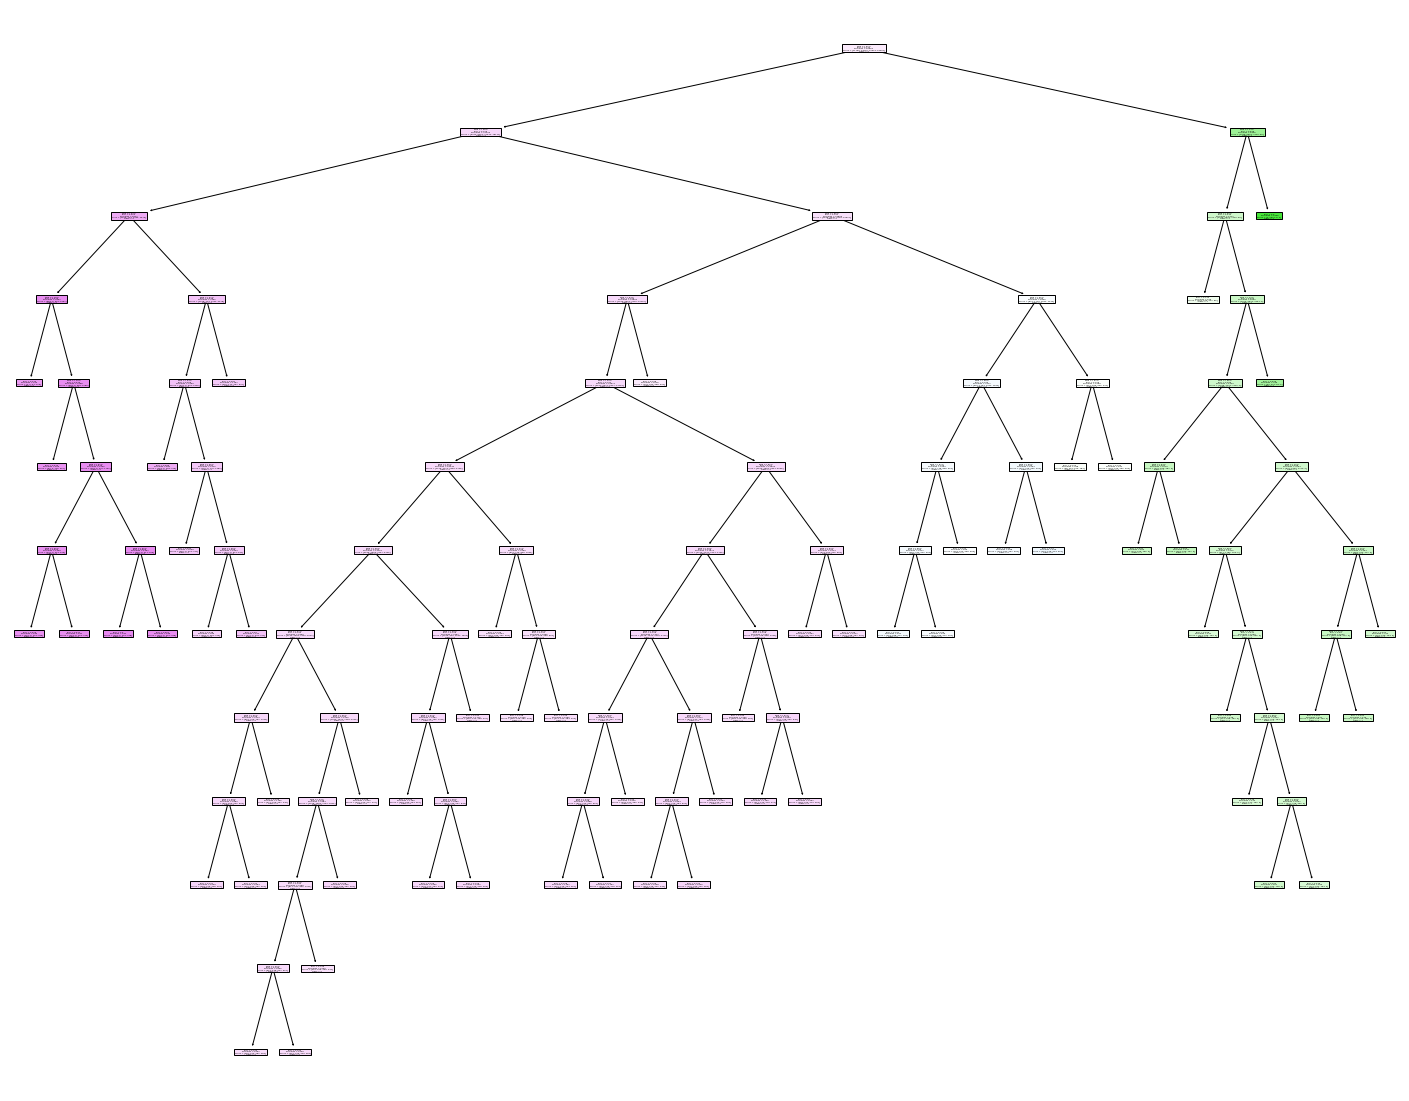

In [22]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=x.columns,class_names=['0', '1', '2', '3'], filled=True)

In [23]:
demo['age'].describe

<bound method NDFrame.describe of 0        37
1        35
2        45
3        46
4        33
         ..
79995    71
79996    59
79997    54
79998    49
79999    30
Name: age, Length: 79979, dtype: int64>

In [24]:
#reference https://pbpython.com/pandas-qcut-cut.html

pd.qcut(demo['age'], q=8)

0        (33.0, 39.0]
1        (33.0, 39.0]
2        (39.0, 45.0]
3        (45.0, 50.0]
4        (27.0, 33.0]
             ...     
79995    (66.0, 85.0]
79996    (56.0, 66.0]
79997    (50.0, 56.0]
79998    (45.0, 50.0]
79999    (27.0, 33.0]
Name: age, Length: 79979, dtype: category
Categories (8, interval[float64, right]): [(17.999, 27.0] < (27.0, 33.0] < (33.0, 39.0] < (39.0, 45.0] < (45.0, 50.0] < (50.0, 56.0] < (56.0, 66.0] < (66.0, 85.0]]

In [25]:
pd.qcut(demo['age'], q=8).value_counts()

(33.0, 39.0]      10531
(39.0, 45.0]      10483
(27.0, 33.0]      10438
(56.0, 66.0]      10378
(17.999, 27.0]    10225
(50.0, 56.0]       9669
(66.0, 85.0]       9451
(45.0, 50.0]       8804
Name: age, dtype: int64

In [26]:
demo['age'].value_counts()

53    1829
32    1788
42    1784
36    1784
34    1783
      ... 
75     334
76     327
79     320
18     223
85     185
Name: age, Length: 68, dtype: int64

In [27]:
pd.cut(demo['age'], bins=8)

0        (34.75, 43.125]
1        (34.75, 43.125]
2         (43.125, 51.5]
3         (43.125, 51.5]
4        (26.375, 34.75]
              ...       
79995    (68.25, 76.625]
79996     (51.5, 59.875]
79997     (51.5, 59.875]
79998     (43.125, 51.5]
79999    (26.375, 34.75]
Name: age, Length: 79979, dtype: category
Categories (8, interval[float64, right]): [(17.933, 26.375] < (26.375, 34.75] < (34.75, 43.125] < (43.125, 51.5] < (51.5, 59.875] < (59.875, 68.25] < (68.25, 76.625] < (76.625, 85.0]]

In [28]:
pd.cut(demo['age'], bins=8).value_counts()

(34.75, 43.125]     15742
(43.125, 51.5]      13973
(26.375, 34.75]     13587
(51.5, 59.875]      11568
(17.933, 26.375]     8859
(59.875, 68.25]      8278
(68.25, 76.625]      4882
(76.625, 85.0]       3090
Name: age, dtype: int64

In [29]:
cut_labels_9 = ['10s','20s','30s','40s','50s','60s','70s','80s','90s']
cut_bins= [1,9, 19, 29, 39, 49, 59, 69, 79, 89]
demo['cut_age'] = pd.cut(demo['age'], bins=cut_bins, labels=False)
demo.info() #verify Dyype is numeric


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
 5   cut_age   79979 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


In [30]:
demo.head(20)

,in-store,age,items,amount,region,cut_age
0,0,37,4,281.0300,2,3
1,0,35,2,219.5100,2,3
2,1,45,3,1525.7000,4,4
3,1,46,3,715.2500,3,4
4,1,33,4,1937.5000,1,3
5,0,24,3,1314.2000,4,2
6,0,43,6,8.5472,2,4
7,1,66,5,819.9800,3,6
8,1,51,5,908.3100,1,5
9,1,47,3,767.5400,1,4


In [31]:
demo['cut_age'].value_counts()

3    17557
4    17518
5    15017
2    12671
6     9014
7     5198
8     2038
1      966
Name: cut_age, dtype: int64

In [32]:
from numpy import linspace

In [33]:
pd.cut(demo['age'], bins=np.linspace(0,90,9, dtype=int))

#reference linspace provides an array of evenly spaced numbers over the define range (first two digits) 
#the third is the number of cut points - should be one less category than number of cut points 
#adding dtype=int produces integers versus floaters

0        (33, 45]
1        (33, 45]
2        (33, 45]
3        (45, 56]
4        (22, 33]
           ...   
79995    (67, 78]
79996    (56, 67]
79997    (45, 56]
79998    (45, 56]
79999    (22, 33]
Name: age, Length: 79979, dtype: category
Categories (8, interval[int64, right]): [(0, 11] < (11, 22] < (22, 33] < (33, 45] < (45, 56] < (56, 67] < (67, 78] < (78, 90]]

In [34]:
#another option would be using numpy.arange
# reference https://www.sharpsightlabs.com/blog/numpy-linspace/
from numpy import arange

In [35]:
#reference https://www.sharpsightlabs.com/blog/numpy-array-python/

np.array(demo['age'],  dtype = 'int')

array([37, 35, 45, ..., 54, 49, 30])

In [36]:
pd.cut(demo['amount'], bins=np.linspace(0,3500,9, dtype=int))

0            (0, 437]
1            (0, 437]
2        (1312, 1750]
3          (437, 875]
4        (1750, 2187]
             ...     
79995      (437, 875]
79996    (1750, 2187]
79997        (0, 437]
79998        (0, 437]
79999      (437, 875]
Name: amount, Length: 79979, dtype: category
Categories (8, interval[int64, right]): [(0, 437] < (437, 875] < (875, 1312] < (1312, 1750] < (1750, 2187] < (2187, 2625] < (2625, 3062] < (3062, 3500]]

In [37]:
demo['amount'].describe

<bound method NDFrame.describe of 0         281.03
1         219.51
2        1525.70
3         715.25
4        1937.50
          ...   
79995     558.82
79996    1932.00
79997     414.16
79998     335.32
79999     527.12
Name: amount, Length: 79979, dtype: float64>

In [38]:
pd.qcut(demo['amount'], q=8)

0          (158.31, 285.12]
1          (158.31, 285.12]
2        (1233.4, 1813.475]
3         (582.14, 841.315]
4        (1813.475, 3000.0]
                ...        
79995      (411.88, 582.14]
79996    (1813.475, 3000.0]
79997      (411.88, 582.14]
79998      (285.12, 411.88]
79999      (411.88, 582.14]
Name: amount, Length: 79979, dtype: category
Categories (8, interval[float64, right]): [(5.004, 158.31] < (158.31, 285.12] < (285.12, 411.88] < (411.88, 582.14] < (582.14, 841.315] < (841.315, 1233.4] < (1233.4, 1813.475] < (1813.475, 3000.0]]

In [39]:
cut_labels_5 = ['100s','500s','1000s','2000s','3000s']
cut_bins= [1, 100, 500, 1000, 2000, 3999]
demo['cut_amount'] = pd.cut(demo['amount'], bins=cut_bins, labels=False)

In [40]:
demo['cut_amount'].value_counts()

1    31326
2    19166
3    17249
4     6750
0     5488
Name: cut_amount, dtype: int64

In [41]:
np.array(demo['cut_age'], dtype=float)



array([3., 3., 4., ..., 5., 4., 3.])

In [42]:
from numpy import reshape

In [43]:
np.reshape((np.array(demo['cut_age'])), (-1,1))

array([[3],
       [3],
       [4],
       ...,
       [5],
       [4],
       [3]], dtype=int64)

In [64]:
#recreating with discretized Amount
print("Classification Report with Amount Bins")

x= demo[['in-store', 'cut_age', 'region', 'items']]
y= demo['cut_amount']

Classification Report with Amount Bins


In [65]:
x.head()

,in-store,cut_age,region,items
0,0,3,2,4
1,0,3,2,2
2,1,4,4,3
3,1,4,3,3
4,1,3,1,4


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier()

In [67]:
model = algo.fit(x_train, y_train)

In [68]:
preds = model.predict(x_test)

In [69]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1628
           1       0.78      0.54      0.64      9386
           2       0.46      0.56      0.50      5819
           3       0.43      0.66      0.52      5152
           4       0.33      0.40      0.36      2009

    accuracy                           0.52     23994
   macro avg       0.40      0.43      0.40     23994
weighted avg       0.53      0.52      0.51     23994



C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#recreating with discretized Age
print("Classification Report with Age Bins")

x= demo[['cut_amount', 'region', 'items', 'in-store']]
y= demo['cut_age']
x.head()

Classification Report with Age Bins


,cut_amount,region,items,in-store
0,1,2,4,0
1,1,2,2,0
2,3,4,3,1
3,2,3,3,1
4,3,1,4,1


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)
algo = DecisionTreeClassifier()

In [73]:
model = algo.fit(x_train, y_train)

In [74]:
preds = model.predict(x_test)

In [75]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       301
           2       0.26      0.29      0.27      3796
           3       0.21      0.32      0.25      5206
           4       0.22      0.26      0.24      5338
           5       0.20      0.17      0.18      4424
           6       0.18      0.04      0.07      2731
           7       0.16      0.13      0.14      1573
           8       0.00      0.00      0.00       625

    accuracy                           0.22     23994
   macro avg       0.15      0.15      0.14     23994
weighted avg       0.20      0.22      0.20     23994



C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bling\anaconda3\envs\task1.1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


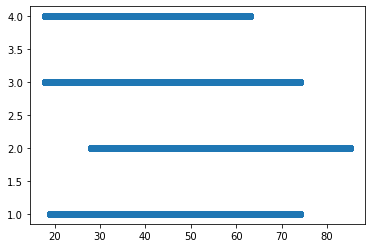

In [76]:
x = demo['age']
y = demo['region']
plt.scatter(x,y, marker='o')
plt.show()

In [56]:
#https://scikit-learn.org/stable/visualizations.html

    
from sklearn.svm import SVC
from sklearn import metrics



In [78]:
#modeling - adding names for algo's



algos_class=[]
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class.append(('Ada Boost Classifier', AdaBoostClassifier()))


In [79]:
print(algos_class)
type(algos_class)


[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Ada Boost Classifier', AdaBoostClassifier())]


list

In [ ]:
results =[]
names = []



In [80]:
X= demo.iloc[:,0:4]
y = demo['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

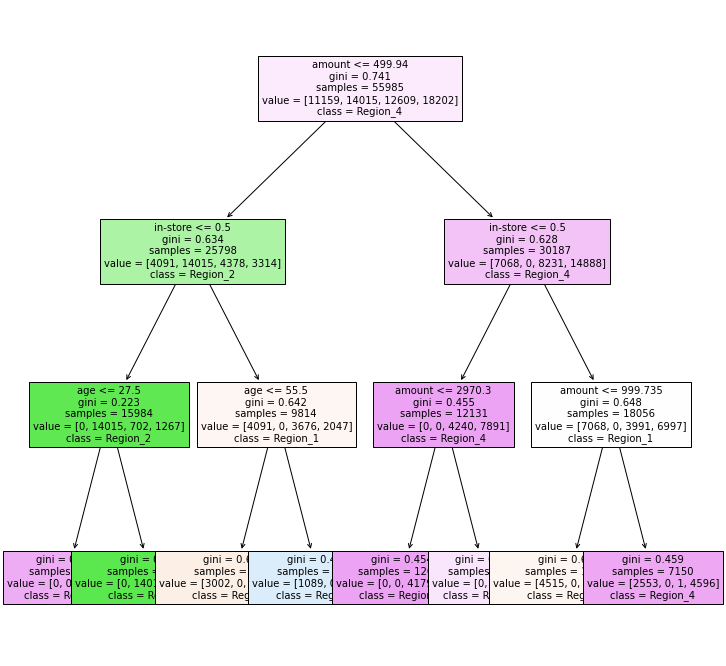

In [81]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.model = dtc.fit(X_train, y_train)

plt.figure(figsize=(12, 12))
plot_tree(dtc.model,
         feature_names=X.columns, 
         class_names=['Region_1', 'Region_2', 'Region_3', 'Region_4'],
         filled = True,
         fontsize=10)
plt.show()

In [82]:
X.head()

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [83]:
# work on second question - 'in-store'


Xb = demo[['region', 'items', 'amount', 'cut_age']]
yb = demo['in-store']

print(Xb.head())
print(yb.head())


   region  items   amount  cut_age
0       2      4   281.03        3
1       2      2   219.51        3
2       4      3  1525.70        4
3       3      3   715.25        4
4       1      4  1937.50        3
0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64


In [87]:
#creating train and test data for 'in store'

X_trainb, X_testb , y_trainb, y_testb = train_test_split(Xb, yb, test_size = .30, random_state = 123)

results_b = []
names_b = []

for name, model in algos_class:
    result = cross_val_score(model, X_trainb, y_trainb, cv=3, scoring='accuracy')
    names_b.append(name)
    results_b.append(result)


    
    